# ANALYZE A SEASON OF JUMPING IN VOLLEYBALL USING VERT

In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime

# Read in the dataset
df = pd.read_csv("../Data/TexasTechVBall.csv")

## Basic data preparation

In [7]:
# copy dataframe to avoid modifying the original version
df_to_analyze = df.copy()

# change date to datetime format
df_to_analyze.loc[:,'DATE'] = pd.to_datetime(df_to_analyze['DATE'], errors='coerce')

# make the first week of the season week 1
df_to_analyze.loc[:,'WEEK'] = (df_to_analyze['DATE'].dt.week) - 33

df_to_analyze['WEEK'] = df_to_analyze['WEEK'].astype('object')  # week to object format

Index(['EVENT NAME', 'EVENT TYPE', 'DATE', 'PLAYER NAME', 'POSITION', 'ENERGY',
       'MAX ENERGY', 'SETS BY ENERGY', 'POWER', 'INTENSITY', 'STRESS',
       'ACTIVE MINS', 'JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)',
       'AVG HI JUMP (in)', '% MAX JUMP', 'MAX JUMP (in)', 'HIGH LANDING %',
       'ALERT LANDING %', 'ELEVATED LANDING %', 'WEEK'],
      dtype='object')

## Are there differences among positions and types of event?

We can calculate the mean value for the total jumps, jumps over 15, jumps over 20 inches, and highest jumps over the different types of games for each position. That will allow us to have a basic idea of the different jumping characteristics of the player depending on the position they usually play.

We can see that, on average, outside hitters had the highest jumps. Also, the highest average values were recorded during scrimmage session by the outside hitters. However, we can also see that outside hitters jump significantly less frequently that the other players. On average, the middle blockers are the players who perform the most jumps (most jumps, most jumps over 15 in and most jumps over 20 in).

In [9]:
jumps_per_position_and_event_type = df_to_analyze.groupby(["EVENT TYPE", "POSITION"]).mean()[
    ['JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)']]

JUMPS   JUMPS 15+  JUMPS 20+  HIGHEST JUMP (in)
EVENT TYPE POSITION                                                      
GAME       MB         77.652174   64.391304  24.434783          25.591304
           OH         48.905660   39.981132  23.962264          26.794340
           S          96.583333   23.458333   0.791667          19.112500
PRAC       MB        132.010000   97.520000  22.450000          24.363000
           OH         81.157407   66.995370  32.972222          25.838605
           S         106.728814   23.991525   0.813559          19.203390
SCRIMMAGE  MB        159.333333  132.000000  35.666667          24.600000
           OH         90.000000   80.428571  53.142857          27.828571
           S         138.750000   37.250000   3.000000          20.225000

We can also explore the different deceleration metrics collected by VERT and see how they differ between the different types of events (games, practices and scrimmages) and positions.

Elevated landings produce high stress on the body and therefore they could lead to injury. We can therefore observe that the outside hitters could be at a greater risk of injury than the other players if their tissues are not sufficiently prepared to deal with the extra load.

In [10]:
deceleration_per_position_and_event_type = df_to_analyze.groupby(["EVENT TYPE", "POSITION"]).mean()[
    ['HIGH LANDING %', 'ALERT LANDING %', 'ELEVATED LANDING %']]
deceleration_per_position_and_event_type

HIGH LANDING %  ALERT LANDING %  ELEVATED LANDING %
EVENT TYPE POSITION                                                     
GAME       MB              5.608696         2.304348            7.739130
           OH             10.226415         2.622642           12.867925
           S               2.833333         1.791667            4.541667
PRAC       MB              3.420000         0.860000            4.330000
           OH              5.361111         1.504630            6.870370
           S               0.991525         0.271186            1.245763
SCRIMMAGE  MB              2.666667         0.333333            3.000000
           OH              6.285714         4.000000           10.428571
           S               3.500000         0.250000            3.750000

## Evolution of alert landings percentages during the season
We can see that the percentage of alert landings during games fluctuate significantly during the season. However, they also follow similar patterns among most of the players. 

For example, many players appear to face significant stress during games around the 10-12 week mark. It would be wise to account for this increase in in-game load and adjust the training load accordingly.

Text(0, 0.5, 'ALERT LANDING %')

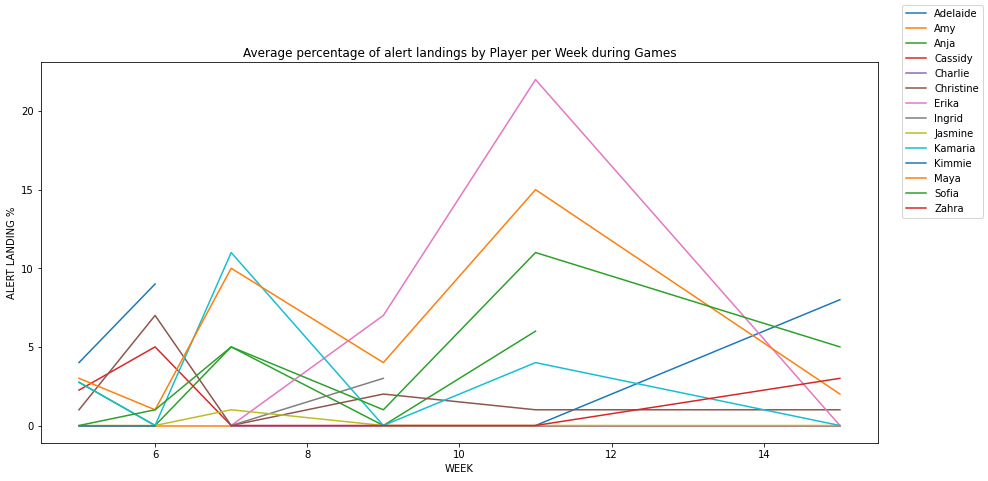

In [14]:
df_game = df_to_analyze.loc[df_to_analyze['EVENT TYPE'] == 'GAME']

# plot data
fig, ax = plt.subplots(figsize=(15,7))

df_game.groupby(['WEEK', 'PLAYER NAME']).mean()['ALERT LANDING %'].unstack().plot(ax=ax, legend=False)

fig.legend(loc="upper right")
plt.title("Average percentage of alert landings by Player per Week during Games")
plt.ylabel("ALERT LANDING %")

## Exploration of correlations between jumps

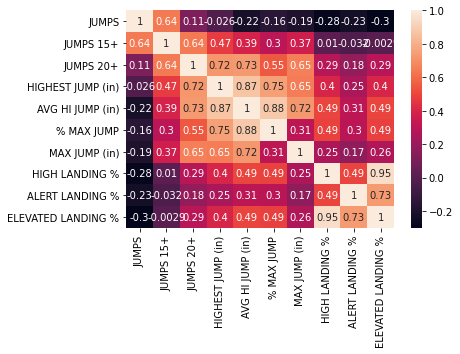

In [17]:
jump_cols = ['JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)',
       'AVG HI JUMP (in)', '% MAX JUMP', 'MAX JUMP (in)', 'HIGH LANDING %',
       'ALERT LANDING %', 'ELEVATED LANDING %']
jumps_df = df_to_analyze[jump_cols]
jumps_corr_matrix = jumps_df.corr()
sn.heatmap(jumps_corr_matrix, annot=True)
plt.show()

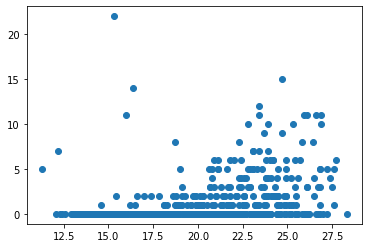

In [20]:
plt.scatter(jumps_df['AVG HI JUMP (in)'], jumps_df['ALERT LANDING %'])
plt.show()

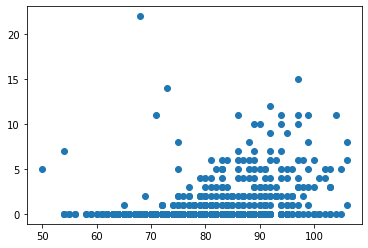

In [21]:
plt.scatter(jumps_df['% MAX JUMP'], jumps_df['ALERT LANDING %'])
plt.show()